<center>
<img src='images/logo.jpg' width='300px'>
<h2> Chương 4: PHÂN VÙNG ẢNH (Image Segmentation)</h2>
</center>

---
* Mã sinh viên: 2121050054
* Họ tên sinh viên: Nguyễn Việt Anh
* Lớp: DCCTKH66
---

* Phân vùng ảnh (image segmentation) là một kỹ thuật quan trọng trong thị giác máy tính. Đây là tiền đề của của quá trình xử lý dữ liệu hình ảnh.
* Phân vùng ảnh là một bước quan trọng trong nhiều lĩnh vực khác nhau như lĩnh vực hình ảnh y tế (medical imaging), phát hiện và nhận dạng đối tượng, hệ thống camera giám sát, hệ thống điều khiển giao thông… 
* Kết quả phân vùng tốt sẽ tạo điều kiện thuận lợi cho các khâu xử lý về sau, đảm bảo tính hiệu quả cao, gia tăng mức độ chính xác, đồng thời giảm thiểu nguồn lực tính toán.

<img src='images/pic1.png' width='500px'>

**Nội dung bài học:**
1. Bài toán phân vùng ảnh
2. Ứng dụng của phần vùng ảnh
3. Các phương pháp phân vùng ảnh
    1. Phân vùng ảnh dựa trên ngưỡng
    2. Phân vùng ảnh dựa trên cạnh
    3. Phân vùng ảnh dựa trên kỹ thuật phân cụm

---
**1. Phân vùng ảnh là gì?**

* Phân vùng ảnh là một phương pháp mà trong đó, hình ảnh kỹ thuật số được chia thành nhiều nhóm con khác nhau được gọi là segments.

* Một cách dễ hiểu, phân vùng ảnh là một quá trình gán nhãn (assigning a lablel) cho mỗi điểm ảnh trong một bức ảnh, các điểm ảnh trong cùng một nhãn sẽ có những đặc tính giống nhau về màu sắc, cường độ hoặc kết cấu của ảnh

**Các cách tiếp cận phân vùng ảnh:**
1. Cách tiếp cận tương đồng (Similarity approach), có nghĩa là phát hiện sự tương đồng giữa các pixel hình ảnh để tạo thành một phân đoạn, dựa trên một ngưỡng. Các thuật toán học máy như phân cụm thường dựa trên kiểu tiếp cận này để phân vùng một hình ảnh.
2. Cách tiếp cận gián đoạn (Discontinuity approach): Cách tiếp cận này dựa trên sự gián đoạn của các giá trị cường độ pixel trong hình ảnh. Các kỹ thuật phát hiện đường, điểm và cạnh sử dụng kiểu tiếp cận gián đoạn để thu được các kết quả phân vùng trung gian. Kết quả này sau đó có thể được xử lý để cho ra hình ảnh được phân vùng cuối cùng.

---
*Copyright @dangvannam.FIT.HUMG*

In [1]:
#Khai báo sử dụng thư viện:
import numpy as np
import matplotlib.pyplot as plt
import cv2
print('Version OpenCV:', cv2.__version__)

Version OpenCV: 4.11.0


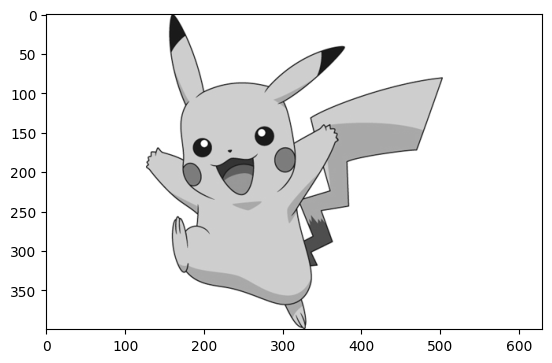

In [2]:
img = cv2.imread('images/pikachu.jpeg',0)
plt.imshow(img,cmap='gray')

# 3. Các phương pháp phân vùng ảnh
---
<img src='images/pic2.png' width='600px'>


## 3.1. Phân vùng ảnh dựa trên ngưỡng
---
* Đây là phương pháp phân vùng đơn giản, giúp tạo ra một hình ảnh nhị phân hoặc nhiều màu dựa trên việc đặt giá trị ngưỡng theo cường độ pixel của ảnh gốc.

* Đối với một ảnh có nền và đối tượng, có thể chia ảnh thành các vùng dựa trên cường độ của đối tượng và nền. Nhưng ngưỡng này phải được thiết lập hoàn hảo để phân đoạn hình ảnh thành một đối tượng và một nền.

* Phân ngưỡng bao gồm các kỹ thuật như:
    * ngưỡng toàn cục (Global thresholding); 
    * ngưỡng thủ công (Manual thresholding); 
    * ngưỡng thích ứng (Adaptive Thresholding); 
    * ngưỡng tối ưu  (Optimal Thresholding); 
    * ngưỡng thích ứng cục bộ (Local Adaptive Thresholding).


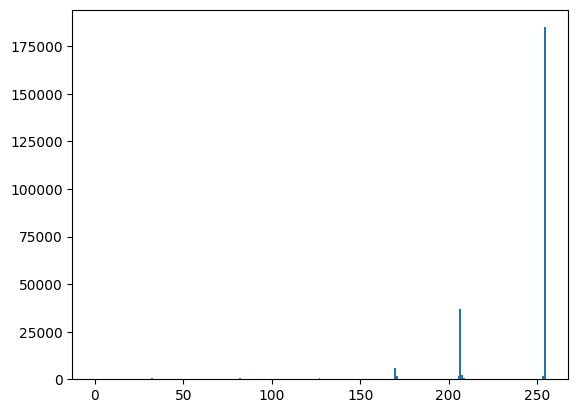

In [3]:
#Đọc ảnh pikachu.jpeg ở chế độ ảnh xám:

plt.hist(img.ravel(),256,[0,255])
plt.show()

### Ngưỡng toàn cục (Global thresholding)
---

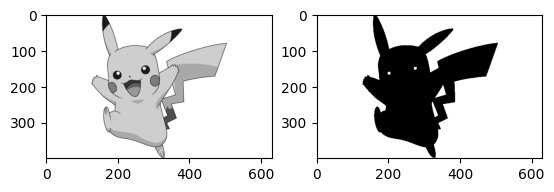

In [4]:
#Hiển thị histogram của ảnh để xác định ngưỡng phù hợp:
T,pic = cv2.threshold(img,220,255,cv2.THRESH_BINARY)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(pic,cmap='gray')


#### phương thức threshold của OpenCV:
---
T,thresh = cv2.threshold(img,T,max,type)

trong đó:
* img: ảnh gốc
* T: giá trị ngưỡng
* max: giá trị đc gán nếu > ngưỡng T
* type: Loại xử lý cắt ngưỡng
    * THRESH_BINARY: Có thể dịch là ngưỡng nhị phân. 
    * THRESH_BINARY_INV: Ngưỡng nhị phân đảo ngược. Có thể hiểu là nó sẽ đảo ngược lại kết quả của THRESH_BINARY.

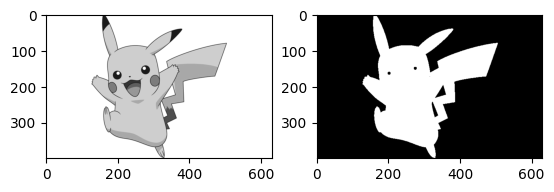

In [5]:
#Lựa chọn ngưỡng và thực hiện cắt ngưỡng cục bộ: T = 220
#Hiển thị histogram của ảnh để xác định ngưỡng phù hợp:
T,pic = cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(pic,cmap='gray')


#Hiển thị kết quả:


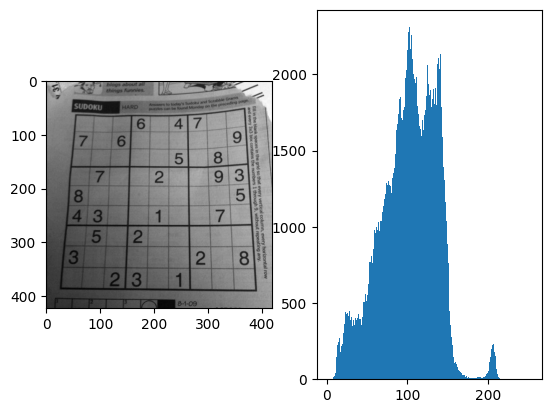

In [11]:
#Cắt ngưỡng cục bộ sau đó thực hiện --> Đảo ảnh ():

pic_sudoku = cv2.imread('images/Pic_sudoku.jpg',0)
#Hiển thị kết quả:
plt.subplot(1,2,1)
plt.imshow(pic_sudoku,cmap='gray')

plt.subplot(1,2,2)
plt.hist(pic_sudoku.ravel(),256,[0,255])
plt.show()

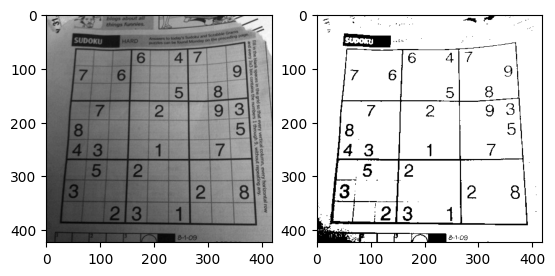

In [22]:
#Việc cắt ngưỡng cục bộ không phù hợp trong nhiều trường hợp:
#Đọc ảnh Pic_sudoku.jpg ở chế độ ảnh xám:

T,pic = cv2.threshold(pic_sudoku,50,255,cv2.THRESH_BINARY)
plt.subplot(1,2,1)
plt.imshow(pic_sudoku,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(pic,cmap='gray')




In [ ]:
#Sử dụng phương án cắt ngưỡng cục bộ:



### b. Ngưỡng thích nghi (Adaptive Thresholding)
---
Phương pháp phân ngưỡng toàn cục không phù hợp cho nhiều trường hợp như là với trường hợp ánh sáng không đồng đều trên ảnh. Khi đó phân ngưỡng thích là một giải pháp.

OpenCV cung cấp phương thức adaptiveThreshold để thực hiện phân ngưỡng thích nghi. Phương thức này sẽ tính giá trị trung bình của n điểm ảnh xung quanh điểm ảnh đó rồi trừ đi C (n là thường là số lẻ, C là một số nguyên bất kỳ)

#### phương thức adaptiveThreshold của OpenCV:
---
pic = cv2.adaptiveThreshold(img, maxValue, thresholdType, type, n, C)

trong đó:
* img: ảnh gốc
* maxValue: giá thiêt lập nếu > giá trị ngưỡng
* adaptiveMethod: phương pháp tính cho các điểm lân cận lấy trung bình hay theo Gaussian
    * ADAPTIVE_THRESH_MEAN_C − threshold value is the mean of neighborhood area.
    * ADAPTIVE_THRESH_GAUSSIAN_C − threshold value is the weighted sum of neighborhood values where weights are a Gaussian window.
* type: Loại xử lý cắt ngưỡng
    * THRESH_BINARY: Có thể dịch là ngưỡng nhị phân. Ý nghĩa y hệt những gì mình đề cập ở trên.
    * THRESH_BINARY_INV: Ngưỡng nhị phân đảo ngược. Có thể hiểu là nó sẽ đảo ngược lại kết quả của THRESH_BINARY.
* n: Số lượng điểm ảnh xung quanh sử dụng để tính giá trị cho điểm đang xét, là số lẻ.

* C: Giá trị số bất kỳ được sử dụng để trừ.

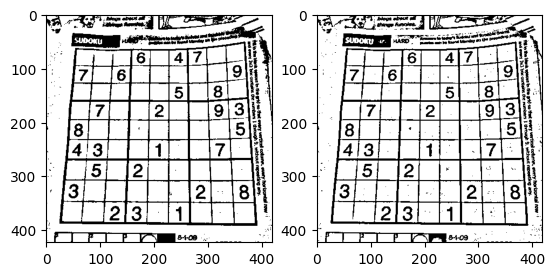

In [29]:
#Thực hiện phân ngưỡng thích nghi
pic = cv2.adaptiveThreshold(pic_sudoku,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,35,5)
plt.subplot(1,2,1)
plt.imshow(pic,cmap='gray')
pic2 = cv2.adaptiveThreshold(pic_sudoku,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,35,5)
plt.subplot(1,2,2)
plt.imshow(pic2,cmap='gray')




## THỰC HÀNH 4.1
---

1. Đọc và hiển thị ảnh Thuchanh4_1.jpeg ở dạng ảnh xám
2. Phân vùng ảnh sử dụng phương pháp phân ngưỡng toàn cục (Hãy xác định ngưỡng phù hợp để đạt kết quả tốt nhất)
3. Phân vùng ảnh sử dụng phương pháp phân ngưỡng thích nghi (Hãy xác định các tham số phù hợp để đạt kết quả tốt nhất)

<img src='images/Thuchanh4_1.jpeg' width='300px'>

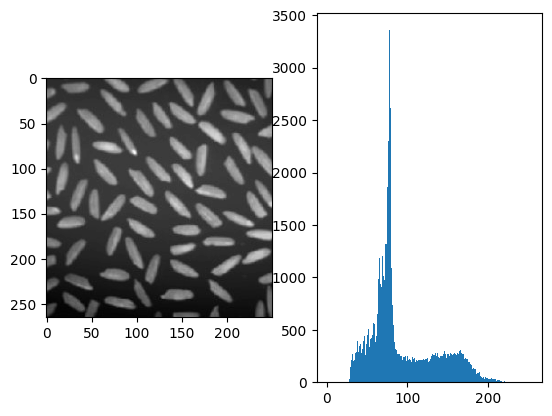

In [34]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}
img = cv2.imread('images/Thuchanh4_1.jpeg',0)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.hist(img.ravel(),255,[0,255])
plt.show()

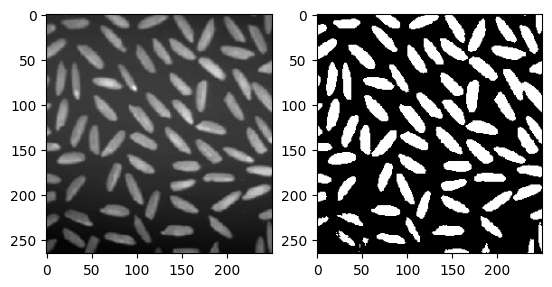

In [33]:
T,pic = cv2.threshold(img,100,255,cv2.THRESH_BINARY)
plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(pic,cmap='gray')


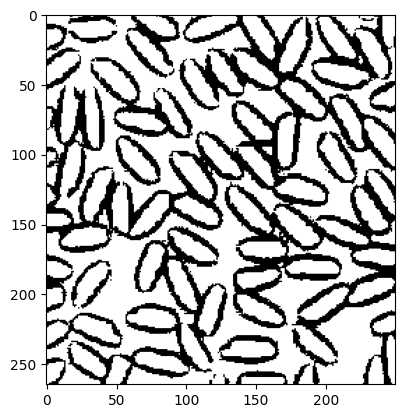

In [56]:
pic = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,9)

plt.imshow(pic,cmap='gray')


## 3.2 Phân vùng ảnh dựa trên cạnh, biên (Edge segmetation method)
---
* Cạnh trong ảnh đánh dấu những vị trí hình ảnh không liên tục về mức xám, màu sắc, kết cấu, v.v. Khi di chuyển từ vùng này sang vùng khác, mức xám có thể thay đổi. Vì vậy, nếu tìm thấy sự gián đoạn đó, ta có thể tìm thấy cạnh. Thực tế, có nhiều toán tử phát hiện cạnh, nhưng hình ảnh thu được là kết quả phân vùng trung gian, và không nên nhầm lẫn với hình ảnh được phân vùng cuối cùng. Để ra được kết quả cuối, cần thực hiện một số bước bổ sung bao gồm: kết hợp các phân vùng cạnh thu được làm một, để giảm số lượng phân vùng và có được một đường viền liền mạch của đối tượng. 

* Như vậy, có thể thấy, phân vùng cạnh đưa ra một kết quả phân vùng trung gian. Kết quả này sau đó có thể áp dụng theo vùng hoặc bất kỳ kiểu phân đoạn nào khác, nhằm có được hình ảnh được phân vùng cuối.

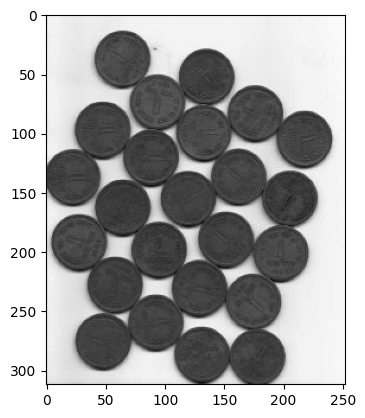

In [57]:
#Đọc ảnh pic_money.jpeg ở chế độ ảnh xám:
img_money = cv2.imread('images/Pic_money.jpeg',0)
plt.imshow(img_money,cmap='gray')

#Hiển thị ảnh gốc:


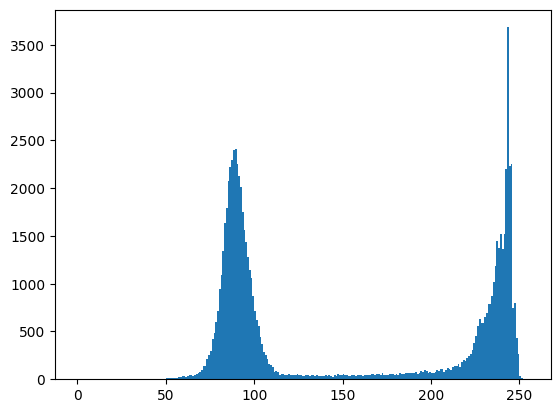

In [58]:
plt.hist(img_money.ravel(),255,[0,255])
plt.show()

### Canny edge detection
---
Phát hiện biên Canny do John Canny khởi xướng vào năm 1986. Là thuật toán được sử dụng phổ biến và hiệu quả trong việc xác định biên.

**cv2.Canny(image, T_lower, T_upper, aperture_size, L2Gradient)**

Trong đó:
1. Image: Input image to which Canny filter will be applied
2. T_lower: Lower threshold value in Hysteresis Thresholding
3. T_upper: Upper threshold value in Hysteresis Thresholding
4. aperture_size: Aperture size of the Sobel filter.
5. L2Gradient: Boolean parameter used for more precision in calculating Edge Gradient.


https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html

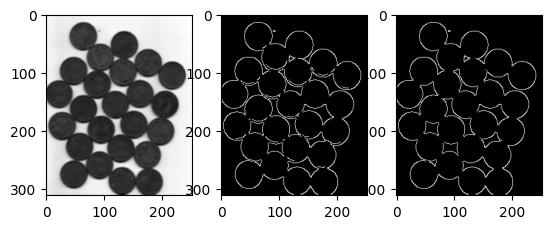

In [68]:
#Làm trơn với Gaussian:
img_ok = cv2.GaussianBlur(img_money,(3,3),3)

#Sử dụng phương thức canny: 1(50,100) - 2(80,170)
img_ok1 = cv2.Canny(img_ok,50,100,3)
img_ok2 = cv2.Canny(img_ok,80,170,3)

#Hiển thị kết quả:
plt.subplot(1,3,1)
plt.imshow(img_ok,cmap='gray')

plt.subplot(1,3,2)
plt.imshow(img_ok1,cmap='gray')


plt.subplot(1,3,3)
plt.imshow(img_ok2,cmap='gray')


**Thực hiện đếm số coins trong hình:**
---
Sử dụng các phương thức OpenCV cung cấp, thực hiện đếm số lượng các đồng xu có trong hình

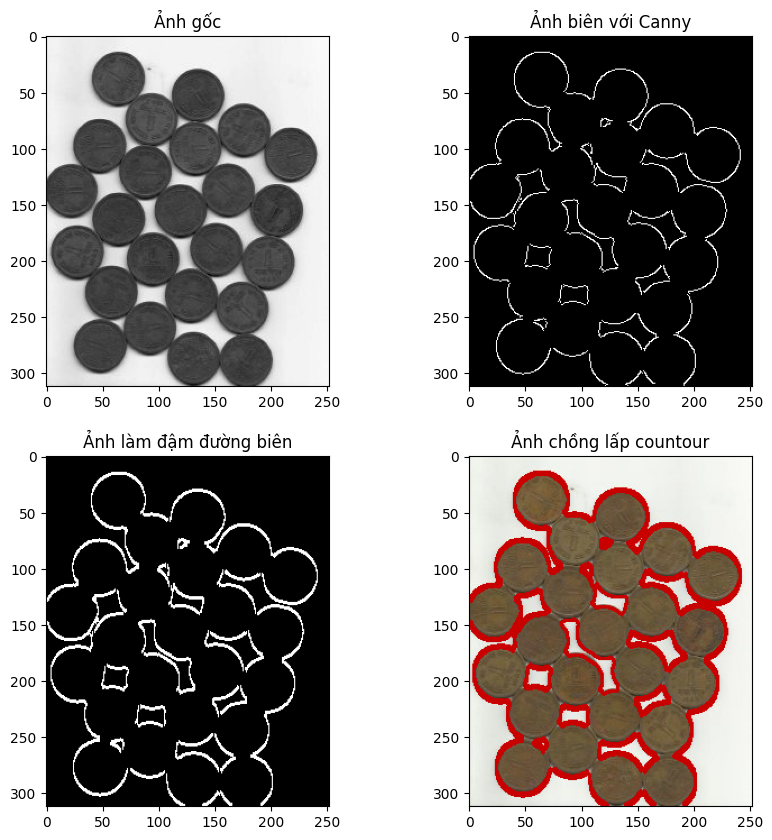

Số lượng đồng xu trong ảnh là:  24


In [71]:
#Bước 1: Đọc ảnh ở chế độ ảnh màu:
image = cv2.imread('images/Pic_money.jpeg')

#Hiển thị ảnh gốc ở dạng xám:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(gray, cmap='gray');
plt.title('Ảnh gốc')

#Bước 2: Phát hiện biên với Canny:
#Thực hiện làm mịn ảnh với Gausian:
blur = cv2.GaussianBlur(gray, (11,11), 0)

#Phát hiện biên với Canny
canny = cv2.Canny(blur, 50, 180, 3)
plt.subplot(2,2,2)
plt.imshow(canny, cmap='gray')
plt.title('Ảnh biên với Canny')


#Bước 3: Làm đậm đường biên:
dilated = cv2.dilate(canny, (1,1), iterations = 2)
plt.subplot(2,2,3)
plt.imshow(dilated, cmap='gray')
plt.title('Ảnh làm đậm đường biên')

#Bước 4: Lấy countour của ảnh và đếm số lượng:
(cnt, heirarchy) = cv2.findContours(dilated.copy(), 
                                    cv2.RETR_EXTERNAL, 
                                    cv2.CHAIN_APPROX_NONE)

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (200,0,0), 2)

plt.subplot(2,2,4)
plt.imshow(rgb)
plt.title('Ảnh chồng lấp countour')
plt.show()

print('Số lượng đồng xu trong ảnh là: ', len(cnt))

# THỰC HÀNH 4.2
---
1. Đọc và hiển thị ảnh Thuchanh4_2.jpg ở dạng ảnh màu.
2. Sử dụng phương pháp Canny với các tham số phù hợp phát hiện biên của các đối tượng trong ảnh.
3. Đếm số lượng bóng bay trong bức ảnh với OpenCV

<img src='images/Thuchanh4_2.jpg' width='400px'>


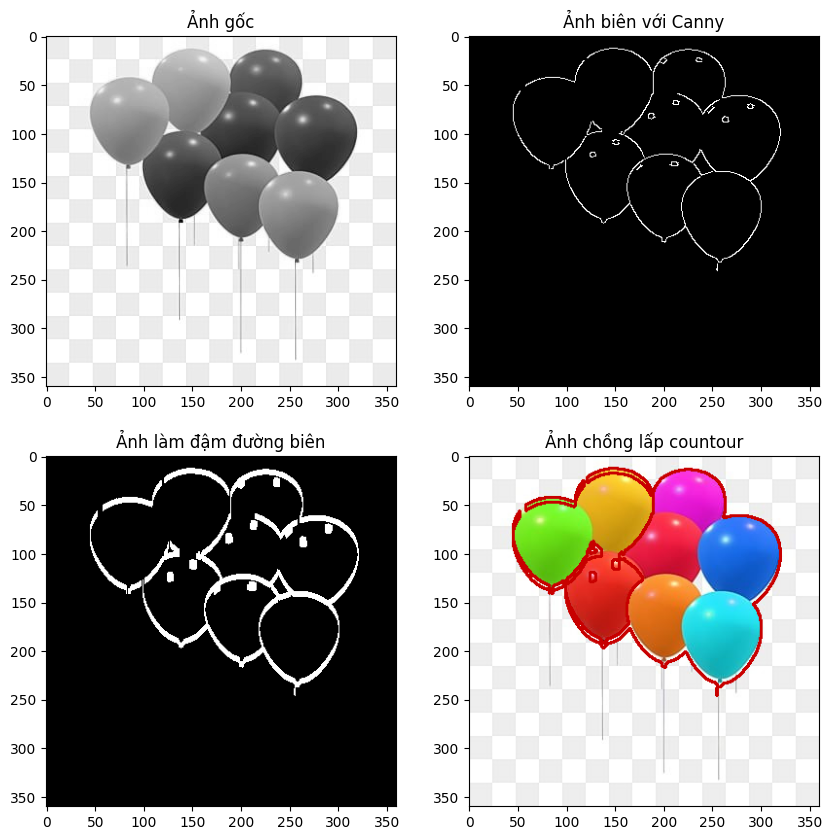

Số lượng đồng xu trong ảnh là:  8


In [101]:
#{HỌC VIÊN VIẾT CODE Ở ĐÂY}

#Bước 1: Đọc ảnh ở chế độ ảnh màu:
image = cv2.imread('images/Thuchanh4_2.jpg')

#Hiển thị ảnh gốc ở dạng xám:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(gray, cmap='gray');
plt.title('Ảnh gốc')

#Bước 2: Phát hiện biên với Canny:
#Thực hiện làm mịn ảnh với Gausian:
blur = cv2.GaussianBlur(gray, (5,5), 0)

#Phát hiện biên với Canny
canny = cv2.Canny(blur, 70, 150, 3)
plt.subplot(2,2,2)
plt.imshow(canny, cmap='gray')
plt.title('Ảnh biên với Canny')


#Bước 3: Làm đậm đường biên:
dilated = cv2.dilate(canny, (5,5), iterations = 5)
plt.subplot(2,2,3)
plt.imshow(dilated, cmap='gray')
plt.title('Ảnh làm đậm đường biên')

#Bước 4: Lấy countour của ảnh và đếm số lượng:
(cnt, heirarchy) = cv2.findContours(dilated.copy(), 
                                    cv2.RETR_EXTERNAL, 
                                    cv2.CHAIN_APPROX_NONE)

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgb, cnt, -1, (200,0,0), 2)

plt.subplot(2,2,4)
plt.imshow(rgb)
plt.title('Ảnh chồng lấp countour')
plt.show()

print('Số lượng đồng xu trong ảnh là: ', len(cnt))



## 3.3 Phân vùng ảnh dựa trên kỹ thuật phân cụm (Clustering based method)
---
* Phân cụm (Clustering) là một loại thuật toán học máy không giám sát, được sử dụng phổ biến trong phân vùng ảnh. Một trong những thuật toán Clustering thường được ứng dụng cho tác vụ phân vùng ảnh là KMeans Clustering. Loại phân cụm này có thể được sử dụng để tạo các phân đoạn trong một hình ảnh có màu.

**KMeans Clustering:**

* Hãy hình dung về một tập dữ liệu 2 chiều. Đầu tiên, trong tập dữ liệu, các trọng tâm – centroid (do người dùng chọn) được khởi tạo ngẫu nhiên. Sau đó, tiến hành tính toán khoảng cách của tất cả các điểm đến tất cả các cụm. Điểm được gán cho cụm có khoảng cách nhỏ nhất. 

* Tiếp đến, trọng tâm của tất cả các cụm được tính toán lại bằng cách lấy giá trị trung bình của cụm đó và các điểm dữ liệu lại một lần nữa được gán cho các cụm. 

* Quá trình này tiếp diễn cho đến khi thuật toán hội tụ thành một giải pháp tốt. Thông thường, số lần lặp lại như vậy rất nhỏ.


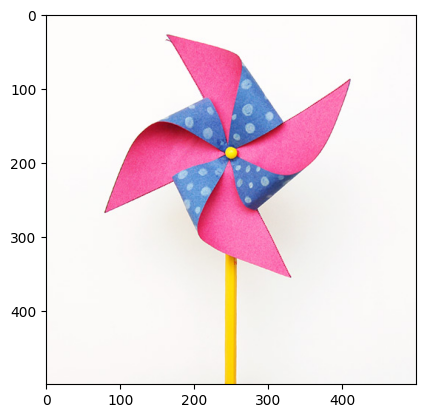

In [102]:
# Đọc ảnh pic2 ở chế độ ảnh màu
img = cv2.imread('images/pic2.jpeg')

#chuyển từ hệ màu GBR sang hệ màu RGB:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#Hiển thị ảnh gốc:
plt.imshow(img)
plt.show()

In [103]:
img

array([[[253, 252, 250],
        [253, 252, 250],
        [253, 252, 250],
        ...,
        [252, 250, 251],
        [252, 250, 251],
        [252, 250, 251]],

       [[253, 252, 250],
        [253, 252, 250],
        [253, 252, 250],
        ...,
        [252, 250, 251],
        [252, 250, 251],
        [252, 250, 251]],

       [[253, 252, 250],
        [253, 252, 250],
        [253, 252, 250],
        ...,
        [252, 250, 251],
        [252, 250, 251],
        [252, 250, 251]],

       ...,

       [[251, 247, 246],
        [251, 247, 246],
        [251, 247, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[251, 247, 246],
        [251, 247, 246],
        [251, 247, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]],

       [[251, 247, 246],
        [251, 247, 246],
        [251, 247, 246],
        ...,
        [246, 246, 246],
        [246, 246, 246],
        [246, 246, 246]]

In [104]:
#Chuyển đổi mảng 3 chiều về ma trận, mỗi cột ứng với một kênh màu
twoDimage = img.reshape((-1,3))
twoDimage = np.float32(twoDimage)

In [105]:
#Ảnh gốc: Mảng 3 chiều
img.shape

(500, 500, 3)

In [106]:
print('Số pixel:', 500*500)

Số pixel: 250000


In [107]:
#dữ liệu ảnh 2 chiều: Ma trận
twoDimage.shape

(250000, 3)

In [108]:
twoDimage

array([[253., 252., 250.],
       [253., 252., 250.],
       [253., 252., 250.],
       ...,
       [246., 246., 246.],
       [246., 246., 246.],
       [246., 246., 246.]], dtype=float32)

**ret,label,center=cv2.kmeans(samples, K,  criteria, attempts, flags)**

**Tham số đầu vào:**
1. samples : Mẫu thì nên là kiểu dữ liệu của np.float32, và mỗi đối tượng cần được đặt trọng cột duy nhất.
2. nclusters (K): Số nhóm yêu cầu tại thời điểm cuối cùng
3. criteria : Đây là tiêu chí chấm dứt vòng lặp. Khi tiêu chí này được thỏa mãn, thuật toán sẽ dừng vòng lặp. Trên thực tế, nó phải là một nhóm 3 thông số (type, max_iter, epsilon):
    * 3.a - loại tiêu chí chấm dứt: Nó có 3 lá cờ như sau: 
        * cv2.TERM_CRITERIA_EPS - ngăn sự lặp lại thuật toán nếu đạt được độ chính xác nhất định - epsilon đạt được. 
        * cv2.TERM_CRITERIA_MAX_ITER - dừng thuật toán sau khi số lượng nhất định được lặp đi lặp lại.
        * cv2.TERM_CRITERIA_EPS max_iter + cv2.TERM_CRITERIA_MAX_ITER - ngăn chặn sự lặp đi lặp lại khi một trong các điều kiện trên nó được đáp ứng
    * 3.b - max_iter - Một số nguyên xác định số lượng tối đa vòng lặp.
    * 3.c - Độ chính xác - epsilon
4. attempts: Cờ để xác định số lần các thuật toán được thực hiện bằng cách sử dụng việc đánh nhãn khởi tạo khác nhau.
5. flags : Cờ này được sử dụng để xác định trung tầm ban đầu được chọn như thế nào. Về cơ bản có 2 cờ được sử dụng là : cv2.KMEANS_PP_CENTERS và cv2.KMEANS_RANDOM_CENTERS.

**Tham số đầu ra:**
1. compactness : Đây là tổng của bình phương khoảng cách từ mỗi điểm đến trọng tâm tương tự của họ.
2. labels : Đây là mảng các label trong đó mỗi phần tử của mảng được đánh dấu '0', '1' .....
3. centers : Đây là mảng trọng tâm của các nhóm.

In [109]:
#Thiết lập các tham số của cụm
K = 2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1.0)
attempts=50

In [110]:
#Sử dụng phương thức cv2.kmeans để phân cụm
ret,label,center=cv2.kmeans(twoDimage,
                            K,
                            None,
                            criteria,
                            attempts,
                            cv2.KMEANS_PP_CENTERS)
center = np.uint8(center)
res = center[label.flatten()]
result_image = res.reshape((img.shape))

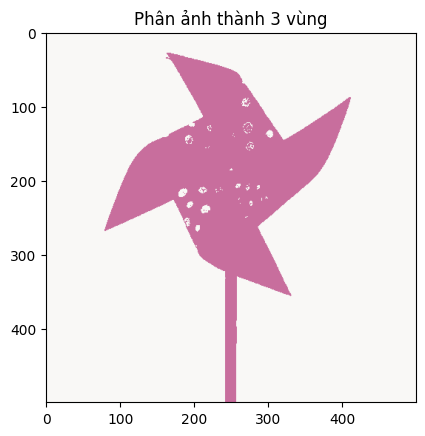

In [111]:
#Hiển thị kết quả phân cụm:
plt.imshow(result_image)
plt.title('Phân ảnh thành 3 vùng')
plt.show()

## Sử dụng thuật toán Kmeans trong thư viện Scikit Learn
---

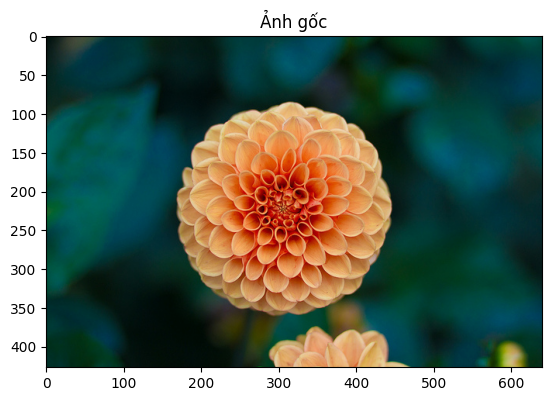

In [112]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_sample_image
#Đọc và hiển thị ảnh mẫu có trong thư viện sklearn:
flower = load_sample_image("flower.jpg")

#Hiển thị ảnh:
plt.imshow(flower)
plt.title('Ảnh gốc')
plt.show()

In [113]:
#Biến đổi dữ liệu ảnh về dạng phù hợp với mô hình:
#Scaling data đưa dữ liệu từ khoảng [0--> 255] về khoảng [0-1]
data=flower/255.0

#Đưa dữ liệu ảnh màu từ mảng 3 chiều về ma trận:
data = data.reshape(-1, 3)

data.shape

(273280, 3)

In [114]:
#Viết hàm hiển thị các pixel điểm ảnh và màu sắc
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data  
    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

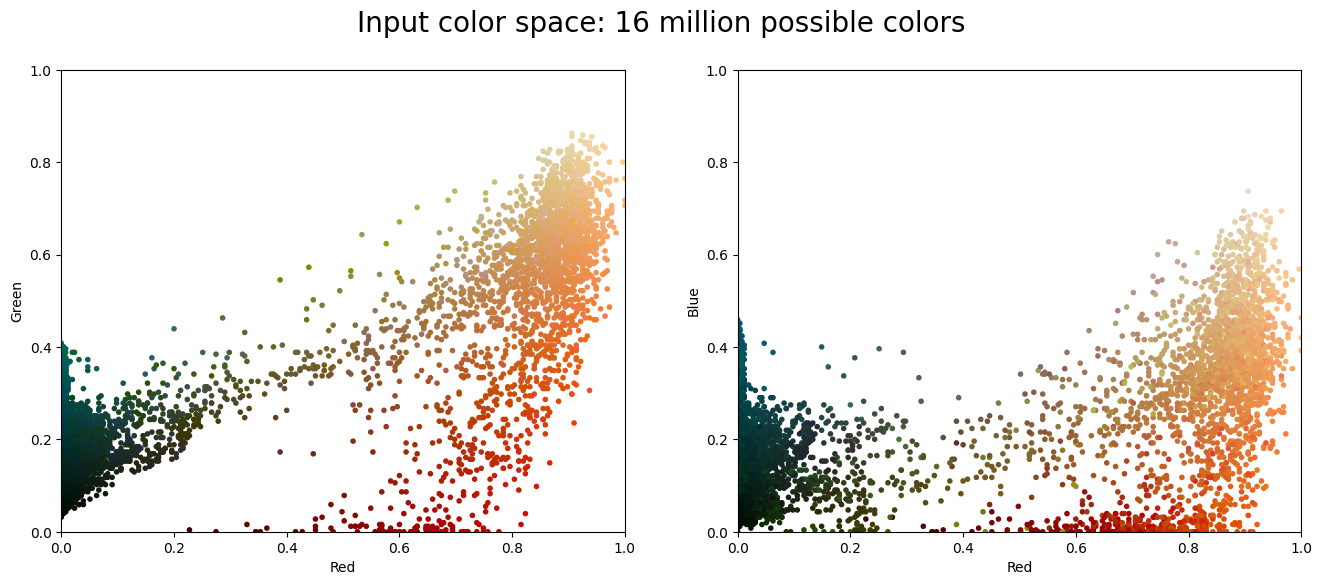

In [115]:
plot_pixels(data, title='Input color space: 16 million possible colors')

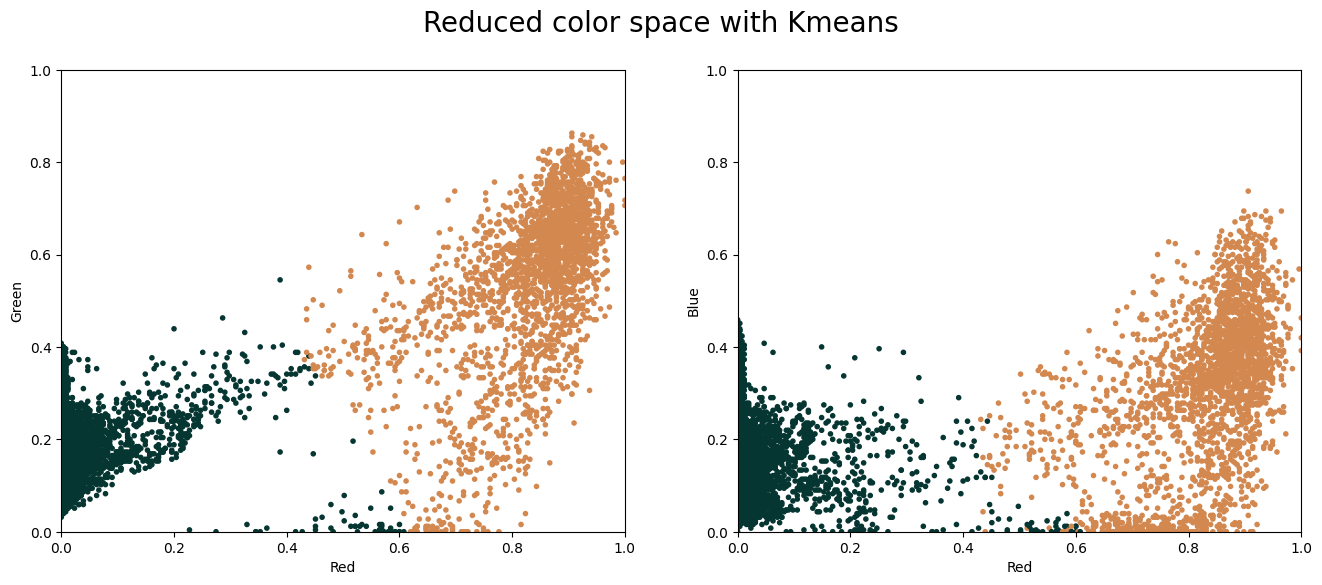

In [116]:
#Sử dụng thư viện học máy Scikit - Learn:
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

#Phân thành 2 cụm:
kmeans_images = KMeans(n_clusters=2)
kmeans_images.fit(data)

#Minh họa kết quả phân cụm các pixel điểm ảnh:
new_colors = kmeans_images.cluster_centers_[kmeans_images.predict(data)]
plot_pixels(data, colors=new_colors,
            title="Reduced color space with Kmeans")

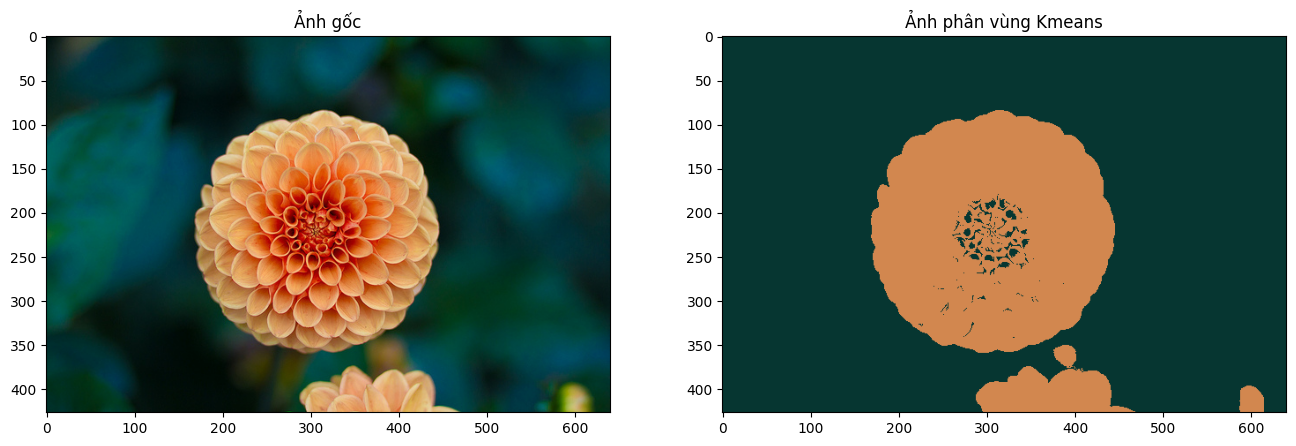

In [117]:
flower_recolored = new_colors.reshape(flower.shape)

#Hiển thị kết quả:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.imshow(flower)
plt.title('Ảnh gốc')

plt.subplot(1,2,2)
plt.imshow(flower_recolored)
plt.title('Ảnh phân vùng Kmeans')
plt.show()

# THỰC HÀNH 4.3
---
1. Đọc và hiển thị ảnh Thuchanh4_3.jpeg ở dạng ảnh màu.
2. Sử dụng phương pháp phân vùng ảnh dựa trên kỹ thuật phân cụm Kmeans để phân ảnh ra thành:
    * 1 cụm
    * 2 cụm
    * 3 cụm
    
* Hiển thị kết quả: ảnh 1 cụm - ảnh 2 cụm - ảnh 3 cụm

<img src='images/Thuchanh4_3.jpeg' width='400px'>

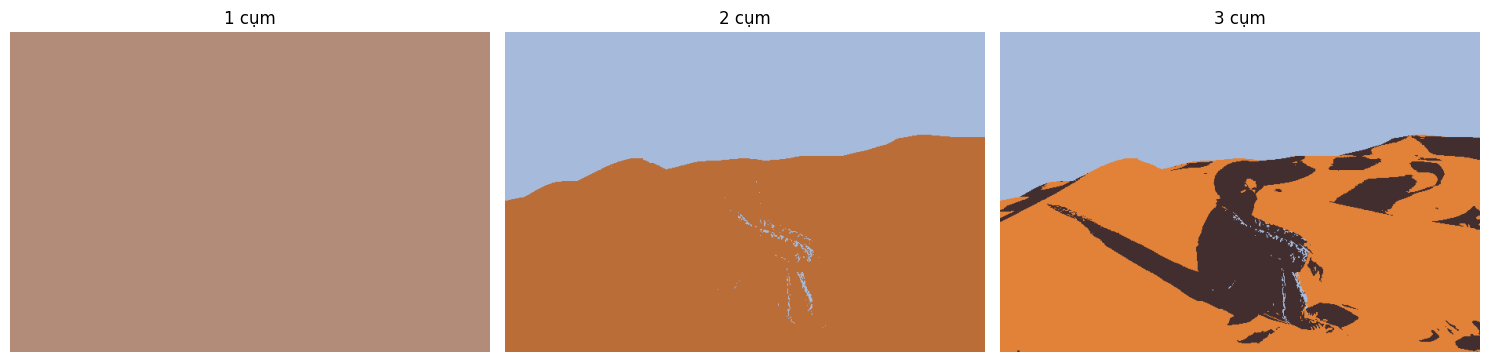

In [12]:
#{HỌC VIÊN VIẾT CODE VÀO ĐÂY}

img = cv2.imread('images/Thuchanh4_3.jpeg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Z = img_rgb.reshape((-1,3))
Z = np.float32(Z)


criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

def apply_cv2_kmeans(k):
    ret, label, center = cv2.kmeans(Z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    result_image = res.reshape((img_rgb.shape))
    return result_image


k_values = [1, 2, 3]
results = [apply_cv2_kmeans(k) for k in k_values]

plt.figure(figsize=(15, 5))
for i, result in enumerate(results):
    plt.subplot(1, 3, i+1)
    plt.imshow(result)
    plt.title(f'{k_values[i]} cụm')
    plt.axis('off')
plt.tight_layout()
plt.show()